In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [14]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

# conditional image captioning
text = "a photography of"
inputs = processor(raw_image, text, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))
# >>> a photography of a woman and her dog

# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt")

out = model.generate(**inputs, **gen_kwargs)
print(processor.decode(out[0], skip_special_tokens=True))

a photography of a woman and her dog on the beach


NameError: name 'gen_kwargs' is not defined

In [ ]:
def read_image(image_path):
    return Image.open(image_path).convert('RGB')

def predict(raw_image):
    max_
    inputs = processor(raw_image, return_tensors="pt")
    out = model.generate(**inputs)
    return processor.decode(out[0], skip_special_tokens=True)

def pipeline(image_path):
    return predict(read_image(image_path))

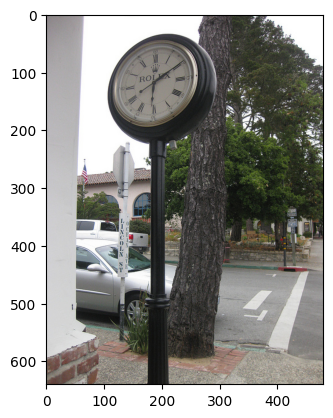

'a clock on a pole'

In [15]:
import matplotlib.pyplot as plt
img_path = "/kaggle/input/coco-2017-dataset/coco2017/train2017/000000000064.jpg"
img = plt.imread(img_path)
plt.imshow(img)
plt.show()
pipeline(img_path) 

In [ ]:
from PIL import Image
from transformers import Blip2Processor, Blip2ForConditionalGeneration, Blip2VisionModel, AutoTokenizer
import torch

In [ ]:
model = Blip2VisionModel.from_pretrained("Salesforce/blip2-opt-2.7b")
feature_extractor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
tokenizer = AutoTokenizer.from_pretrained("Salesforce/blip2-opt-2.7b")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

max_length = 80
min_length = 50
num_beams = 4
gen_kwargs = {"min_length": min_length, "max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
    images = []
    for image_path in image_paths:
        i_image = Image.open(image_path)
        if i_image.mode != "RGB":
            i_image = i_image.convert(mode="RGB")

        images.append(i_image)

    pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)

    output_ids = model.generate(pixel_values, **gen_kwargs)

    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    preds = [pred.strip() for pred in preds]
    return preds

In [ ]:
import matplotlib.pyplot as plt
img_path = "/kaggle/input/coco-2017-dataset/coco2017/train2017/000000000064.jpg"
img = plt.imread(img_path)
plt.imshow(img)
plt.show()
predict_step([img_path]) 